# 0.Objetivo

Se busca desarrollar un modelo predictivo que genere una clasificación binaria sobre las pólizas del archivo test.csv. El objetivo es poder identificar cuáles son las pólizas que realizaran un reclamo de siniestros. Se utilizarán diversas técnicas. Seleccionando las para evaluar los distintos modelos. Además, se creará el modelo justificando la elección. Este documento corresponde a el modelo

# 1. Entendiendo el problema

## 1.1. Data

Se trae la data previamente arreglada

In [46]:
import pandas as pd
import csv

# Lee el archivo CSV con comillas como caracteres de cita y manejo de comas dentro de las comillas
df= pd.read_csv('/content/df_train.csv')
df= df.drop('Unnamed: 0', axis=1)

df

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,RECLAMO
0,300226657,2014-07-01,2015-06-30,16,Female,1201,17000.00,163.200,5000546971,Private,NaN,1980.0,1.0,1.477876,Motor-cycle,183.0,SUZUKI,0
1,300231460,2014-07-01,2015-06-30,1,Female,1202,2600000.00,45761.900,5000578640,Own service,30981.20,2013.0,99.0,26.543324,Bus,9700.0,BISHOFTU,1
2,300046799,2014-07-01,2015-06-30,7,Female,1201,80000.00,907.200,5000059976,Private,NaN,1990.0,4.0,2.307381,Automobile,1300.0,TOYOTA,0
3,300046807,2014-07-01,2015-06-30,0,Female,1201,225000.00,3690.550,5000059986,Private,NaN,2002.0,4.0,2.307381,Automobile,1299.0,MITSUBISHI,0
4,300046812,2014-07-01,2015-06-30,1,Female,1202,950000.00,10441.890,5000059996,Own Goods,2167218.69,2004.0,1.0,6.000000,Pick-up,0.0,TOYOTA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406170,300334494,2017-08-07,2018-08-06,1,Female,1202,695136.93,11279.320,5000778040,Own service,NaN,2015.0,24.0,15.000000,Bus,4650.0,TOYOTA,0
406171,300119191,2017-08-07,2018-08-06,6,Female,1202,900000.00,10828.750,5000213479,Own Goods,NaN,2007.0,4.0,7.000000,Pick-up,0.0,TOYOTA,0
406172,300046288,2017-08-07,2018-08-06,0,Female,1201,700000.00,9644.525,5000070876,Private,NaN,2010.0,4.0,2.307381,Automobile,0.0,TOYOTA,0
406173,300256129,2017-08-07,2018-08-06,13,Female,1201,1500000.00,16694.150,5000626182,Private,NaN,2004.0,4.0,2.743577,Station Wagones,2269.0,VOLKSWAGEN,0


### 1.1.1 Y

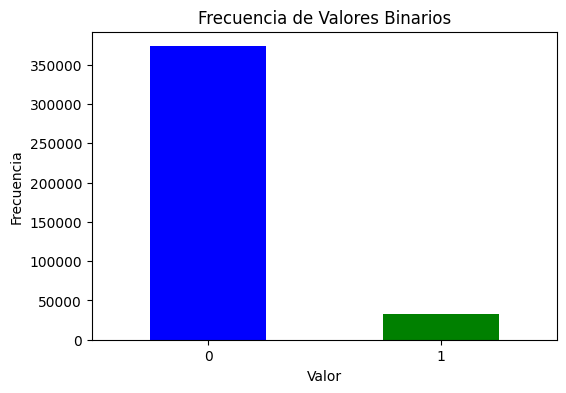

In [47]:
import matplotlib.pyplot as plt
counts = df["RECLAMO"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['blue', 'green'])

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores Binarios')

# Mostrar el gráfico
plt.xticks(rotation=0)  # Para mantener la orientación de las etiquetas del eje x
plt.show()

In [48]:
y=df["RECLAMO"]
y

0         0
1         1
2         0
3         0
4         1
         ..
406170    0
406171    0
406172    0
406173    0
406174    0
Name: RECLAMO, Length: 406175, dtype: int64

Al graficarlo se evidencia que es un conjunto desbalanceado, es decir es un problema de clasificación desbalanceada

### 1.1.1 X

Se comienza a ordenar la data para hacer la division entre train y test,en primera medida se decide  clasificar las fechas desagregando por dia, mes y año

In [49]:
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'])
df['INSR_END'] = pd.to_datetime(df['INSR_END'])
df['INSR_BEGIN_year'] = df['INSR_BEGIN'].dt.year
df['INSR_BEGIN_month'] = df['INSR_BEGIN'].dt.month
df['INSR_BEGIN_day'] = df['INSR_BEGIN'].dt.day
df['INSR_END_year'] = df['INSR_END'].dt.year
df['INSR_END_month'] = df['INSR_END'].dt.month
df['INSR_END_day'] = df['INSR_END'].dt.day

# Eliminar las columnas originales de fecha

df.drop(columns=['INSR_BEGIN', 'INSR_END'], inplace=True)

In [50]:
df.drop(columns=["RECLAMO","CLAIM_PAID"], inplace=True)
df

,POLICY_ID,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
0,300226657,16,Female,1201,17000.00,163.200,5000546971,Private,1980.0,1.0,1.477876,Motor-cycle,183.0,SUZUKI,2014,7,1,2015,6,30
1,300231460,1,Female,1202,2600000.00,45761.900,5000578640,Own service,2013.0,99.0,26.543324,Bus,9700.0,BISHOFTU,2014,7,1,2015,6,30
2,300046799,7,Female,1201,80000.00,907.200,5000059976,Private,1990.0,4.0,2.307381,Automobile,1300.0,TOYOTA,2014,7,1,2015,6,30
3,300046807,0,Female,1201,225000.00,3690.550,5000059986,Private,2002.0,4.0,2.307381,Automobile,1299.0,MITSUBISHI,2014,7,1,2015,6,30
4,300046812,1,Female,1202,950000.00,10441.890,5000059996,Own Goods,2004.0,1.0,6.000000,Pick-up,0.0,TOYOTA,2014,7,1,2015,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406170,300334494,1,Female,1202,695136.93,11279.320,5000778040,Own service,2015.0,24.0,15.000000,Bus,4650.0,TOYOTA,2017,8,7,2018,8,6
406171,300119191,6,Female,1202,900000.00,10828.750,5000213479,Own Goods,2007.0,4.0,7.000000,Pick-up,0.0,TOYOTA,2017,8,7,2018,8,6
406172,300046288,0,Female,1201,700000.00,9644.525,5000070876,Private,2010.0,4.0,2.307381,Automobile,0.0,TOYOTA,2017,8,7,2018,8,6
406173,300256129,13,Female,1201,1500000.00,16694.150,5000626182,Private,2004.0,4.0,2.743577,Station Wagones,2269.0,VOLKSWAGEN,2017,8,7,2018,8,6


se expresa la policy id como index

In [51]:
df.set_index('POLICY_ID', inplace=True)
df

,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,,,,,,,,
300226657,16,Female,1201,17000.00,163.200,5000546971,Private,1980.0,1.0,1.477876,Motor-cycle,183.0,SUZUKI,2014,7,1,2015,6,30
300231460,1,Female,1202,2600000.00,45761.900,5000578640,Own service,2013.0,99.0,26.543324,Bus,9700.0,BISHOFTU,2014,7,1,2015,6,30
300046799,7,Female,1201,80000.00,907.200,5000059976,Private,1990.0,4.0,2.307381,Automobile,1300.0,TOYOTA,2014,7,1,2015,6,30
300046807,0,Female,1201,225000.00,3690.550,5000059986,Private,2002.0,4.0,2.307381,Automobile,1299.0,MITSUBISHI,2014,7,1,2015,6,30
300046812,1,Female,1202,950000.00,10441.890,5000059996,Own Goods,2004.0,1.0,6.000000,Pick-up,0.0,TOYOTA,2014,7,1,2015,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300334494,1,Female,1202,695136.93,11279.320,5000778040,Own service,2015.0,24.0,15.000000,Bus,4650.0,TOYOTA,2017,8,7,2018,8,6
300119191,6,Female,1202,900000.00,10828.750,5000213479,Own Goods,2007.0,4.0,7.000000,Pick-up,0.0,TOYOTA,2017,8,7,2018,8,6
300046288,0,Female,1201,700000.00,9644.525,5000070876,Private,2010.0,4.0,2.307381,Automobile,0.0,TOYOTA,2017,8,7,2018,8,6


se decide clasificar las variables categoricas, para esto se utiliza LabelEncoder, este se utiliza para convertir etiquetas de texto en números enteros.

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable categórica
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['USAGE'] = label_encoder.fit_transform(df['USAGE'])
df['TYPE_VEHICLE'] = label_encoder.fit_transform(df['TYPE_VEHICLE'])
df['MAKE'] = label_encoder.fit_transform(df['MAKE'])

df


,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,,,,,,,,
300226657,16,0,1201,17000.00,163.200,5000546971,11,1980.0,1.0,1.477876,2,183.0,429,2014,7,1,2015,6,30
300231460,1,0,1202,2600000.00,45761.900,5000578640,10,2013.0,99.0,26.543324,1,9700.0,49,2014,7,1,2015,6,30
300046799,7,0,1201,80000.00,907.200,5000059976,11,1990.0,4.0,2.307381,0,1300.0,446,2014,7,1,2015,6,30
300046807,0,0,1201,225000.00,3690.550,5000059986,11,2002.0,4.0,2.307381,0,1299.0,335,2014,7,1,2015,6,30
300046812,1,0,1202,950000.00,10441.890,5000059996,9,2004.0,1.0,6.000000,3,0.0,446,2014,7,1,2015,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300334494,1,0,1202,695136.93,11279.320,5000778040,10,2015.0,24.0,15.000000,1,4650.0,446,2017,8,7,2018,8,6
300119191,6,0,1202,900000.00,10828.750,5000213479,9,2007.0,4.0,7.000000,3,0.0,446,2017,8,7,2018,8,6
300046288,0,0,1201,700000.00,9644.525,5000070876,11,2010.0,4.0,2.307381,0,0.0,446,2017,8,7,2018,8,6


In [53]:
df.drop(columns=['VEHICLE_ID'], inplace=True)
df

,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,,,,,,,
300226657,16,0,1201,17000.00,163.200,11,1980.0,1.0,1.477876,2,183.0,429,2014,7,1,2015,6,30
300231460,1,0,1202,2600000.00,45761.900,10,2013.0,99.0,26.543324,1,9700.0,49,2014,7,1,2015,6,30
300046799,7,0,1201,80000.00,907.200,11,1990.0,4.0,2.307381,0,1300.0,446,2014,7,1,2015,6,30
300046807,0,0,1201,225000.00,3690.550,11,2002.0,4.0,2.307381,0,1299.0,335,2014,7,1,2015,6,30
300046812,1,0,1202,950000.00,10441.890,9,2004.0,1.0,6.000000,3,0.0,446,2014,7,1,2015,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300334494,1,0,1202,695136.93,11279.320,10,2015.0,24.0,15.000000,1,4650.0,446,2017,8,7,2018,8,6
300119191,6,0,1202,900000.00,10828.750,9,2007.0,4.0,7.000000,3,0.0,446,2017,8,7,2018,8,6
300046288,0,0,1201,700000.00,9644.525,11,2010.0,4.0,2.307381,0,0.0,446,2017,8,7,2018,8,6


In [54]:
X=df
X

,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,,,,,,,
300226657,16,0,1201,17000.00,163.200,11,1980.0,1.0,1.477876,2,183.0,429,2014,7,1,2015,6,30
300231460,1,0,1202,2600000.00,45761.900,10,2013.0,99.0,26.543324,1,9700.0,49,2014,7,1,2015,6,30
300046799,7,0,1201,80000.00,907.200,11,1990.0,4.0,2.307381,0,1300.0,446,2014,7,1,2015,6,30
300046807,0,0,1201,225000.00,3690.550,11,2002.0,4.0,2.307381,0,1299.0,335,2014,7,1,2015,6,30
300046812,1,0,1202,950000.00,10441.890,9,2004.0,1.0,6.000000,3,0.0,446,2014,7,1,2015,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300334494,1,0,1202,695136.93,11279.320,10,2015.0,24.0,15.000000,1,4650.0,446,2017,8,7,2018,8,6
300119191,6,0,1202,900000.00,10828.750,9,2007.0,4.0,7.000000,3,0.0,446,2017,8,7,2018,8,6
300046288,0,0,1201,700000.00,9644.525,11,2010.0,4.0,2.307381,0,0.0,446,2017,8,7,2018,8,6


###1.2. Agrupar data

In [55]:
from sklearn.model_selection import train_test_split
# Separar los conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, train_size=0.7)

In [56]:
print(X_train.shape)
print(X_test.shape)

(284322, 18)
(121853, 18)


# 2.Modelos

In [57]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Función para evaluar los modelos (Gráfico de AUC y Métricas Importantes)

def evaluarElModelo(xtest, ytest, modelo):
    # Obtenemos las probabilidades predichas para la clase positiva (5yrs = 1)
    y_pred_proba_positive = modelo.predict_proba(xtest)[:, 1]

    # Calculamos las métricas
    y_pred = modelo.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_proba_positive)
    logloss = log_loss(ytest, y_pred)

    # Graficamos la curva ROC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba_positive)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimimos las métricas
    print(f'Exactitud: {accuracy:.2f}')
    print(f'Sensibilidad: {recall:.2f}')
    print(f'Precisión: {precision:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'AUC-ROC: {roc_auc:.2f}')
    print(f'Pérdida Logarítmica (Log Loss): {logloss:.2f}')

In [58]:
# Función para gráficar matriz de confusión

def graficarMatrizConfusion(ytrue, ypred, title=None):

    # Calculate the confusion matrix
    cm = confusion_matrix(ytrue, ypred)

    # Create a heatmap with annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn')

    plt.xlabel('Predichos')
    plt.ylabel('Reales')

    if title:
        plt.title(title)

    # Add annotations for each quadrant
    plt.annotate('Verdadero Negativo', xy=(0.25, 0.85), xycoords='axes fraction', va='center', ha='center')
    plt.annotate('Falso Positivo', xy=(0.75, 0.85), xycoords='axes fraction', va='center', ha='center')
    plt.annotate('Falso Negativo', xy=(0.25, 0.35), xycoords='axes fraction', va='center', ha='center')
    plt.annotate('Verdadero Positivo', xy=(0.75, 0.35), xycoords='axes fraction', va='center', ha='center')

    plt.show()

## 2.1.  Regresion logistica

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

#  regresion con cross validation

rl_cv = LogisticRegressionCV(cv=5, scoring='roc_auc' ,random_state=0)
rl_cv.fit(X_train_std, y_train)

y_predic_rlcv = rl_cv.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positiveRLCV = rl_cv.predict_proba(X_test_std)[:, 1]

print("Test", rl_cv.score(X_test_std, y_test))

Test 0.7291665972002453


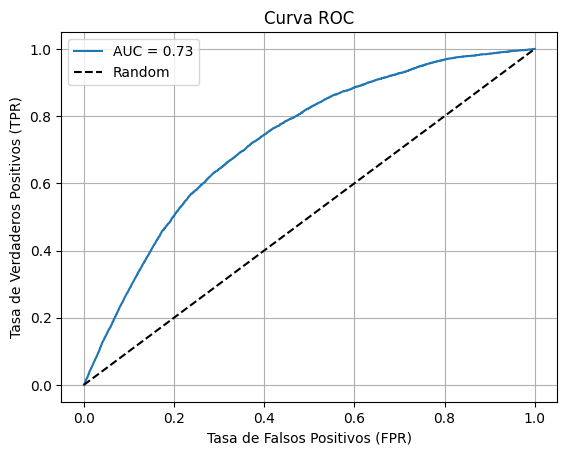

Exactitud: 0.92
Sensibilidad: 0.00
Precisión: 0.20
F1-score: 0.01
AUC-ROC: 0.73
Pérdida Logarítmica (Log Loss): 2.97


In [61]:


# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test,rl_cv)

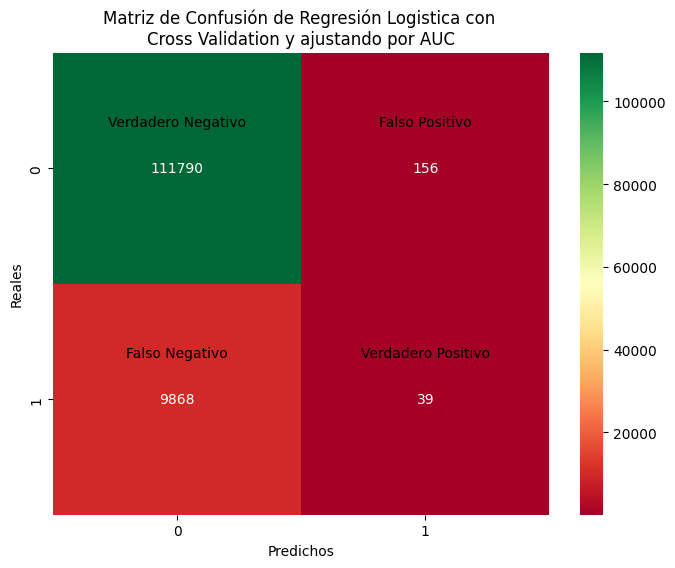

In [62]:
# Graficamos la matriz de confusión
import seaborn as sns

graficarMatrizConfusion(y_test, y_predic_rlcv, title="Matriz de Confusión de Regresión Logistica con \nCross Validation y ajustando por AUC")

##2.2. Regresion logistica con pesos de clase

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

# Calcular los pesos de clase
class_weights = class_weight.compute_class_weight('balanced', classes=y_train.unique(), y=y_train)

# Crear y entrenar el modelo de regresión logística con pesos de clase

rl_pc = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
rl_pc.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_predic_rl_pc = rl_pc.predict(X_test)

# Imprimir métricas de evaluación
print(classification_report(y_test, y_predic_rl_pc))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    111946
           1       0.16      0.56      0.25      9907

    accuracy                           0.73    121853
   macro avg       0.56      0.65      0.54    121853
weighted avg       0.89      0.73      0.79    121853



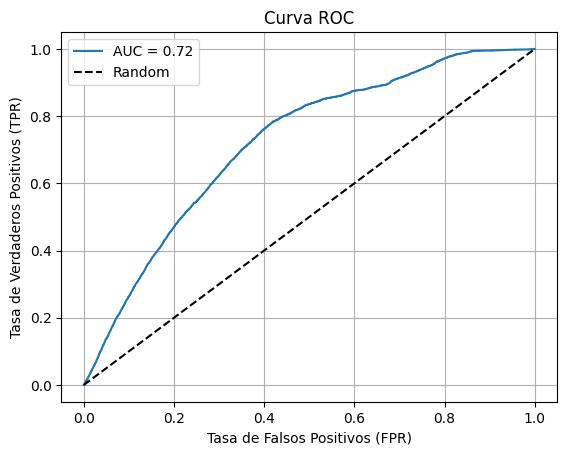

Exactitud: 0.73
Sensibilidad: 0.56
Precisión: 0.16
F1-score: 0.25
AUC-ROC: 0.72
Pérdida Logarítmica (Log Loss): 9.80


In [64]:

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Evaluamos el modelo
evaluarElModelo(X_test, y_test,rl_pc)

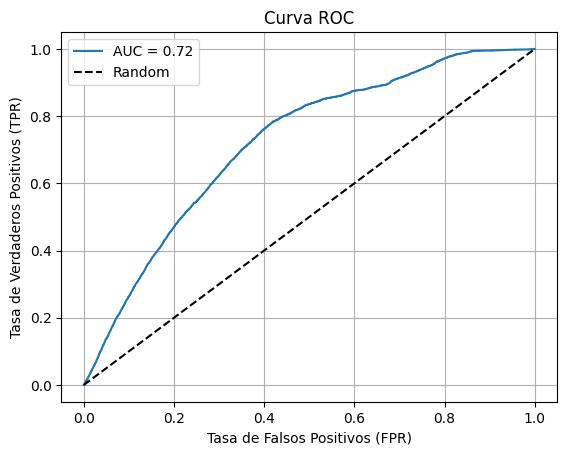

Exactitud: 0.73
Sensibilidad: 0.56
Precisión: 0.16
F1-score: 0.25
AUC-ROC: 0.72
Pérdida Logarítmica (Log Loss): 9.80


In [65]:
# Evaluamos el modelo
evaluarElModelo(X_test, y_test,rl_pc)

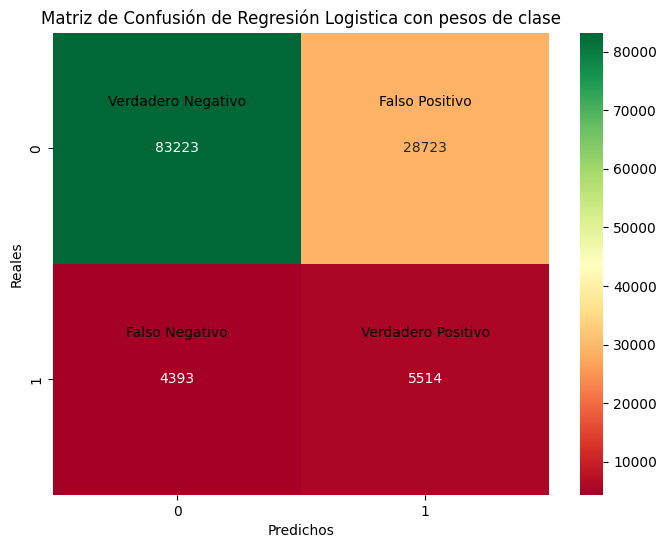

In [66]:
# Graficamos la matriz de confusión
import seaborn as sns

graficarMatrizConfusion(y_test, y_predic_rl_pc, title="Matriz de Confusión de Regresión Logistica con pesos de clase")

## 2.3. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier ## se demora
from sklearn.metrics import classification_report

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_predic_rf = rf_model.predict(X_test)

# Imprimir métricas de evaluación
print(classification_report(y_test, y_predic_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    111946
           1       0.26      0.13      0.18      9907

    accuracy                           0.90    121853
   macro avg       0.59      0.55      0.56    121853
weighted avg       0.87      0.90      0.88    121853



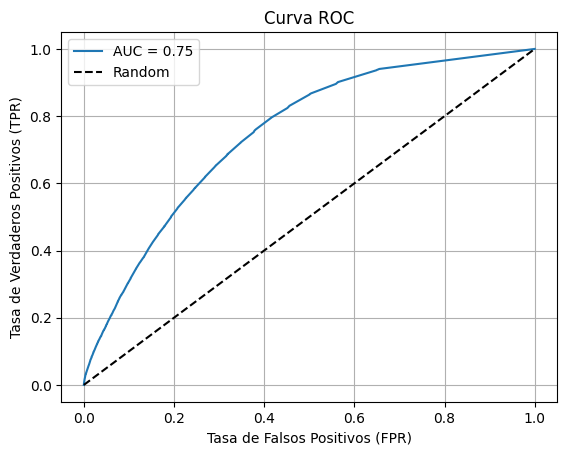

Exactitud: 0.90
Sensibilidad: 0.13
Precisión: 0.26
F1-score: 0.18
AUC-ROC: 0.75
Pérdida Logarítmica (Log Loss): 3.64


In [68]:
# Evaluamos el modelo
evaluarElModelo(X_test, y_test,rf_model)

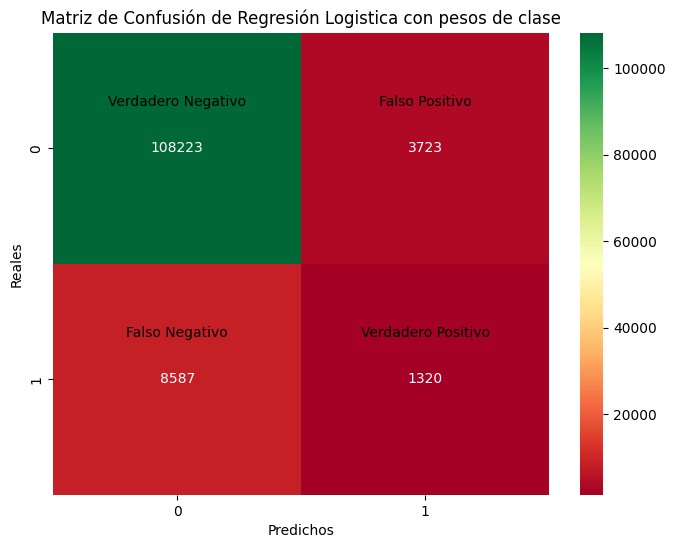

In [69]:
graficarMatrizConfusion(y_test,y_predic_rf, title="Matriz de Confusión de Regresión Logistica con pesos de clase")

### 2.3.1 Random Forest SMOTE

In [70]:
from imblearn.over_sampling import SMOTE # se demora
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aplicar sobre-muestreo utilizando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo Random Forest
rf_model_s = RandomForestClassifier(random_state=42)
rf_model_s.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_predic_rf_s = rf_model_s.predict(X_test)

# Imprimir métricas de evaluación
print(classification_report(y_test, y_predic_rf_s))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    111946
           1       0.23      0.23      0.23      9907

    accuracy                           0.87    121853
   macro avg       0.58      0.58      0.58    121853
weighted avg       0.87      0.87      0.87    121853



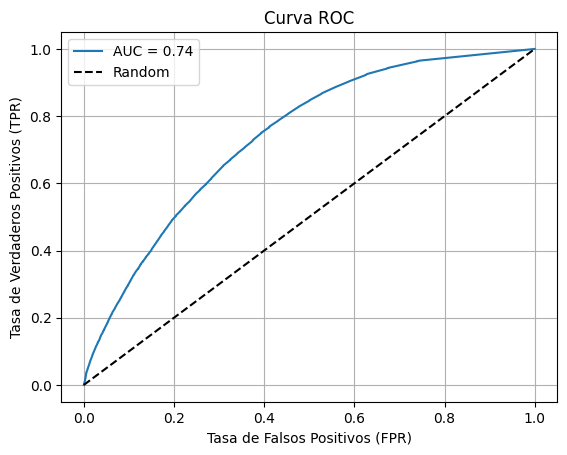

Exactitud: 0.87
Sensibilidad: 0.23
Precisión: 0.23
F1-score: 0.23
AUC-ROC: 0.74
Pérdida Logarítmica (Log Loss): 4.56


In [71]:
# Evaluamos el modelo
evaluarElModelo(X_test, y_test,rf_model_s)

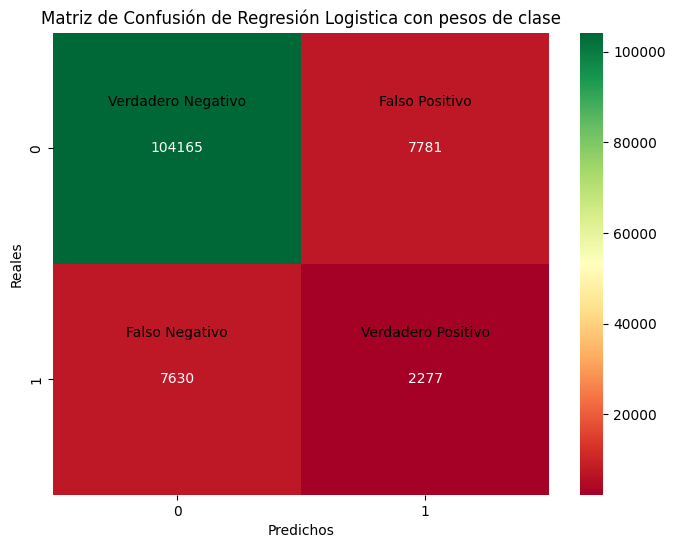

In [72]:
graficarMatrizConfusion(y_test,y_predic_rf_s, title="Matriz de Confusión de Regresión Logistica con pesos de clase")

## 2.4. Xgboost

In [73]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Crear y entrenar el modelo XGBoost c porque es completo
xgb_model_c = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_model_c.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_predic_xgb = xgb_model_c.predict(X_test)

# Imprimir métricas de evaluación
print(classification_report(y_test, y_predic_xgb ))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78    111946
           1       0.17      0.79      0.28      9907

    accuracy                           0.66    121853
   macro avg       0.57      0.72      0.53    121853
weighted avg       0.91      0.66      0.74    121853



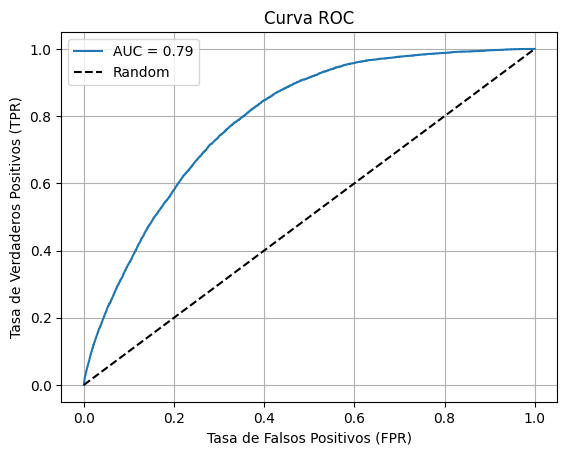

Exactitud: 0.66
Sensibilidad: 0.79
Precisión: 0.17
F1-score: 0.28
AUC-ROC: 0.79
Pérdida Logarítmica (Log Loss): 12.08


In [74]:
# Evaluamos el modelo
evaluarElModelo(X_test, y_test,xgb_model_c)

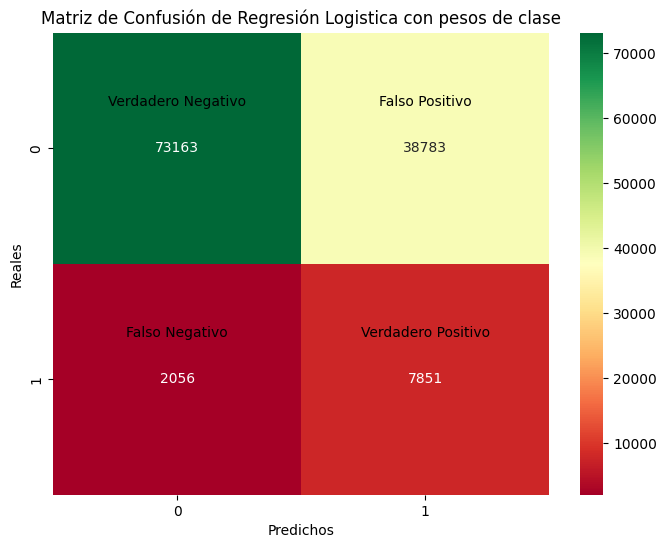

In [75]:
graficarMatrizConfusion(y_test,y_predic_xgb, title="Matriz de Confusión de Regresión Logistica con pesos de clase")

## 2.5. Red Neuronal

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo de red neuronal
red = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide para clasificación binaria
])

# Compilar el modelo
red.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
red.fit(X_train, y_train, epochs=10, batch_size=32, class_weight={0: 1, 1: 10})  # Ajusta el peso de clase según lo necesites

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = red.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Epoch 1/10
8886/8886 [==============================] - 20s 2ms/step - loss: 1602.1261 - accuracy: 0.6300
Epoch 2/10
8886/8886 [==============================] - 17s 2ms/step - loss: 191.9296 - accuracy: 0.6705
Epoch 3/10
8886/8886 [==============================] - 17s 2ms/step - loss: 39.9360 - accuracy: 0.6829
Epoch 4/10
8886/8886 [==============================] - 18s 2ms/step - loss: 2.6892 - accuracy: 0.5792
Epoch 5/10
8886/8886 [==============================] - 18s 2ms/step - loss: 1.0474 - accuracy: 0.4722
Epoch 6/10
8886/8886 [==============================] - 18s 2ms/step - loss: 1.0774 - accuracy: 0.4716
Epoch 7/10
8886/8886 [==============================] - 18s 2ms/step - loss: 1.0374 - accuracy: 0.4775
Epoch 8/10
8886/8886 [==============================] - 17s 2ms/step - loss: 1.0307 - accuracy: 0.5009
Epoch 9/10
8886/8886 [==============================] - 19s 2ms/step - loss: 1.1889 - accuracy: 0.8968
Epoch 10/10
3808/3808 [==============================] - 8s 2ms/ste

In [77]:
# Hacer predicciones en el conjunto de prueba
y_pred_red = red.predict(X_test)

# Convertir las predicciones de probabilidad en etiquetas de clase (0 o 1)
y_pred_red_binary = (y_pred_red > 0.5).astype(int)

# Imprimir las primeras 10 predicciones
print("Predicciones del conjunto de prueba:")
print(y_pred_red_binary[:10])

3808/3808 [==============================] - 6s 2ms/step
Predicciones del conjunto de prueba:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


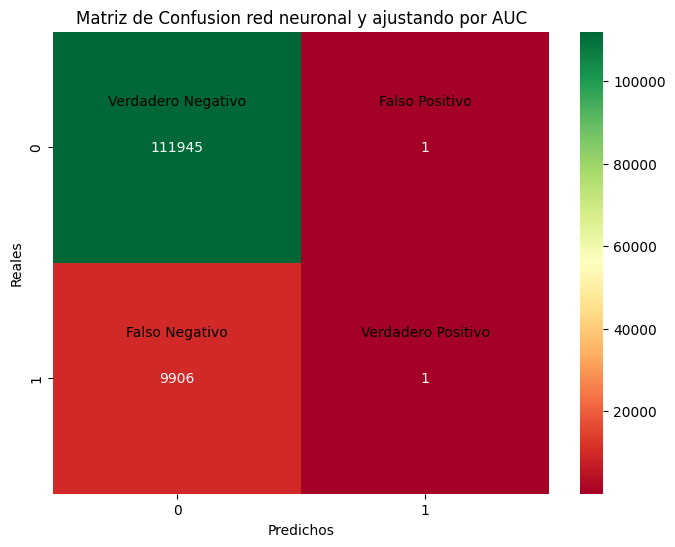

In [78]:
# Graficamos la matriz de confusión
import seaborn as sns

graficarMatrizConfusion(y_test,y_pred_red_binary, title="Matriz de Confusion red neuronal y ajustando por AUC")

Es notoria la mejoria de la matriz de confunsion con un modelo de Red Neural, sin embargo no es posible ver la importancia de las variables, por tal motivo no se toma este modelo

# 3.Seleccion del modelo

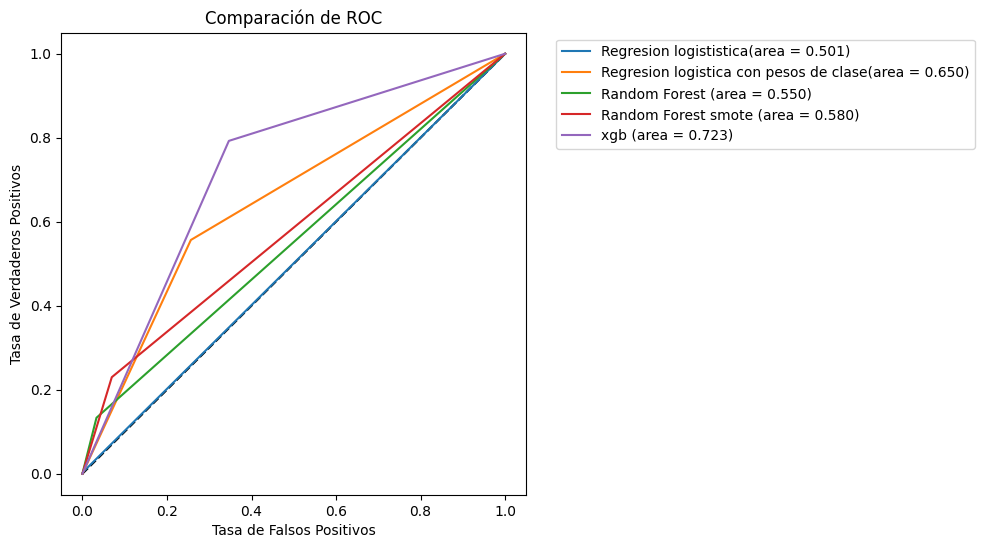

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve, auc
from sklearn.metrics import roc_auc_score
# regresion logistica
fpr_rlcv, tpr_rlcv, thresholds_rlcv = roc_curve(y_test, y_predic_rlcv)
# regresion logistica con peso de clase
fpr_rl_pc, tpr_rl_pc, thresholds_rl_pc = roc_curve(y_test, y_predic_rl_pc)
# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predic_rf)
# Random Forest con smote
fpr_rf_s, tpr_rf_s, thresholds_rf_S = roc_curve(y_test, y_predic_rf_s)
# Regresion  xgb
fpr_xgb , tpr_xgb , thresholds_xgb  = roc_curve(y_test, y_predic_xgb )


auc_rlcv = auc(fpr_rlcv, tpr_rlcv)
auc_rl_pc = auc(fpr_rl_pc, tpr_rl_pc)
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf_s = auc(fpr_rf_s, tpr_rf_s)
auc_xgb  = auc(fpr_xgb , tpr_xgb )

# Creamos la figura y ajustamos el tamaño de la figura para hacerlo menos alto
plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')


# plt.plot(fpr_lr, tpr_lr, label='RLA (area = {:.3f})'.format(auc_lr))

plt.plot(fpr_rlcv, tpr_rlcv, label='Regresion logististica(area = {:.3f})'.format(auc_rlcv))
plt.plot(fpr_rl_pc, tpr_rl_pc, label='Regresion logistica con pesos de clase(area = {:.3f})'.format(auc_rl_pc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_rf_s, tpr_rf_s, label='Random Forest smote (area = {:.3f})'.format(auc_rf_s))

plt.plot(fpr_xgb, tpr_xgb, label='xgb (area = {:.3f})'.format(auc_xgb))

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de ROC')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Teniendo en cuenta las matrices de confunsion y el anterior grafico se decide tomar el modelo  XGB

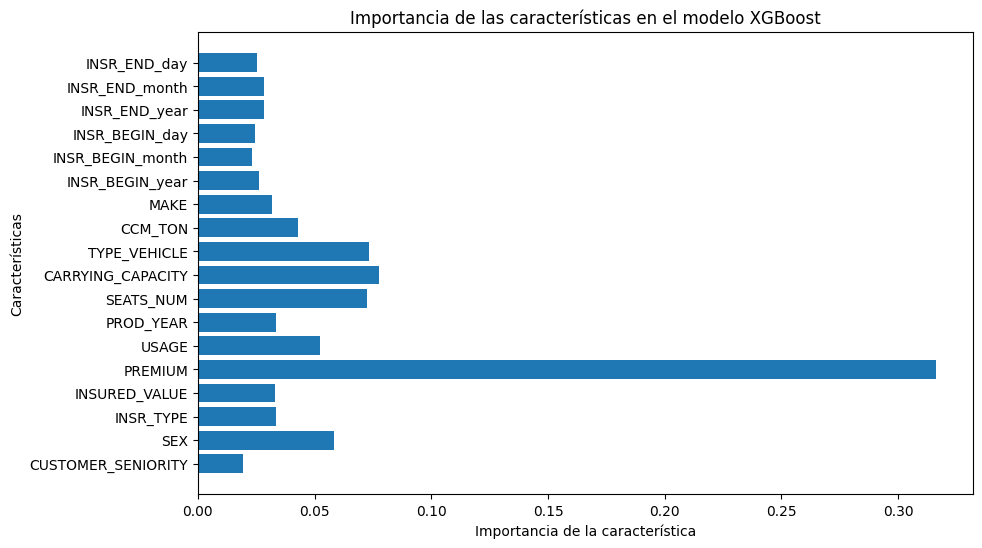

In [80]:
import matplotlib.pyplot as plt

# Entrenar el modelo XGBoost
xgb_model_c.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = xgb_model_c.feature_importances_

# Obtener el nombre de las características
feature_names = X.columns

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia de la característica')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo XGBoost')
plt.show()

#4. Test

In [81]:
import pandas as pd
import csv

# Lee el archivo CSV con comillas como caracteres de cita y manejo de comas dentro de las comillas
test = pd.read_csv('/content/test.csv')

In [82]:
test.isnull().sum()

POLICY_ID             0
INSR_BEGIN            0
INSR_END              0
CUSTOMER_SENIORITY    0
SEX                   0
INSR_TYPE             0
INSURED_VALUE         0
PREMIUM               4
VEHICLE_ID            0
USAGE                 0
dtype: int64

In [84]:
test.loc[test['PREMIUM'].isnull(), 'PREMIUM'] = 0

In [85]:
 test.isnull().sum()

POLICY_ID             0
INSR_BEGIN            0
INSR_END              0
CUSTOMER_SENIORITY    0
SEX                   0
INSR_TYPE             0
INSURED_VALUE         0
PREMIUM               0
VEHICLE_ID            0
USAGE                 0
dtype: int64

In [87]:
# Lee el archivo CSV con comillas como caracteres de cita y manejo de comas dentro de las comillas
vehicle_info_arreglada = pd.read_csv('/content/vehicle_info_arreglada.csv')


In [88]:
test['VEHICLE_ID'] = test['VEHICLE_ID'].astype(int)
vehicle_info_arreglada['VEHICLE_ID']= vehicle_info_arreglada['VEHICLE_ID'].astype(int)

In [89]:
test_merged = pd.merge(test,vehicle_info_arreglada, on='VEHICLE_ID', how='left')
test_merged

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,Unnamed: 0,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE
0,300439992,08-AUG-17,07-AUG-18,0,Male,1202,0.00,347.700,5000994884,Fare Paying Passengers,167610.0,2016.0,3.0,1.477876,Motor-cycle,200.0,BAJAJ
1,300476572,08-AUG-17,07-AUG-18,2,Female,1201,1515442.28,17045.520,5001113560,Private,192702.0,2015.0,8.0,2.743577,Station Wagones,4164.0,MITSUBISHI
2,300485215,08-AUG-17,07-AUG-18,0,Female,1201,3200000.00,18088.330,5001173958,Private,199944.0,2017.0,8.0,2.743577,Station Wagones,4164.0,TOYOTA
3,300477745,08-AUG-17,07-AUG-18,0,Female,1201,418528.41,5140.660,5001113455,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300477746,08-AUG-17,07-AUG-18,0,Female,1201,418528.41,5140.660,5001113463,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101983,300507475,30-JUN-18,29-JUN-19,1,Male,1202,0.00,4470.500,5001268861,General Cartage,221484.0,2017.0,1.0,171.046142,Truck,4570.0,ISUZU
101984,300507474,30-JUN-18,29-JUN-19,2,Male,1201,0.00,221.200,5001268678,Private,221483.0,2015.0,1.0,1.477876,Motor-cycle,0.0,BOXER
101985,300415333,30-JUN-18,29-JUN-19,17,Female,1202,0.00,2713.290,5000919714,Own service,153105.0,1982.0,24.0,26.543324,Bus,2366.0,TOYOTA
101986,300507473,30-JUN-18,29-JUN-19,2,Male,1202,0.00,347.700,5001268457,Taxi,221482.0,2015.0,3.0,1.477876,Motor-cycle,173.5,BAJAJ


In [90]:
test_merged.isnull().sum()

POLICY_ID               0
INSR_BEGIN              0
INSR_END                0
CUSTOMER_SENIORITY      0
SEX                     0
INSR_TYPE               0
INSURED_VALUE           0
PREMIUM                 0
VEHICLE_ID              0
USAGE                   0
Unnamed: 0            459
PROD_YEAR             459
SEATS_NUM             459
CARRYING_CAPACITY     459
TYPE_VEHICLE          459
CCM_TON               459
MAKE                  459
dtype: int64

##5.1 Test C


In [91]:
testc = test_merged.dropna(subset=['TYPE_VEHICLE'])
test_c = testc.drop('Unnamed: 0', axis=1)
df=test_c
#tests = test_merged[test_merged['n'].isna()]

In [92]:
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'])
df['INSR_END'] = pd.to_datetime(df['INSR_END'])
df['INSR_BEGIN_year'] = df['INSR_BEGIN'].dt.year
df['INSR_BEGIN_month'] = df['INSR_BEGIN'].dt.month
df['INSR_BEGIN_day'] = df['INSR_BEGIN'].dt.day
df['INSR_END_year'] = df['INSR_END'].dt.year
df['INSR_END_month'] = df['INSR_END'].dt.month
df['INSR_END_day'] = df['INSR_END'].dt.day

# Eliminar las columnas originales de fecha

df.drop(columns=['INSR_BEGIN', 'INSR_END'], inplace=True)

In [93]:

df.set_index('POLICY_ID', inplace=True)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable categórica
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['USAGE'] = label_encoder.fit_transform(df['USAGE'])
df['TYPE_VEHICLE'] = label_encoder.fit_transform(df['TYPE_VEHICLE'])
df['MAKE'] = label_encoder.fit_transform(df['MAKE'])



df.drop(columns=['VEHICLE_ID'], inplace=True)

test_c= df
test_c

,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,USAGE,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,,,,,,,
300439992,0,1,1202,0.00,347.700,4,2016.0,3.0,1.477876,2,200.0,30,2017,8,8,2018,8,7
300476572,2,0,1201,1515442.28,17045.520,11,2015.0,8.0,2.743577,5,4164.0,225,2017,8,8,2018,8,7
300485215,0,0,1201,3200000.00,18088.330,11,2017.0,8.0,2.743577,5,4164.0,302,2017,8,8,2018,8,7
300485214,0,0,1201,3200000.00,18093.330,11,2017.0,8.0,2.743577,5,4164.0,302,2017,8,8,2018,8,7
300485217,0,0,1201,3200000.00,18088.330,11,2017.0,8.0,2.743577,5,4164.0,302,2017,8,8,2018,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300507475,1,1,1202,0.00,4470.500,6,2017.0,1.0,171.046142,10,4570.0,162,2018,6,30,2019,6,29
300507474,2,1,1201,0.00,221.200,11,2015.0,1.0,1.477876,2,0.0,44,2018,6,30,2019,6,29
300415333,17,0,1202,0.00,2713.290,10,1982.0,24.0,26.543324,1,2366.0,302,2018,6,30,2019,6,29


In [94]:
# aunque utilizaria mejor la red
# Hacer predicciones en el conjunto de prueba
predictions = xgb_model_c.predict(test_c)
predictions


# Crear una lista de tuplas con el índice y la predicción
data = [(idx, pred) for idx, pred in zip(test_c.index, predictions)]

# Convertir la lista en un DataFrame
df_predictions = pd.DataFrame(data, columns=['Index', 'Prediction'])

# Imprimir el DataFrame con los índices y las predicciones
print(df_predictions)

            Index  Prediction
0       300439992           0
1       300476572           1
2       300485215           1
3       300485214           1
4       300485217           1
...           ...         ...
101524  300507475           0
101525  300507474           0
101526  300415333           0
101527  300507473           0
101528  300260574           0

[101529 rows x 2 columns]


##5.2 Test S

Dado que hay datos del test que  no tienen todas las columnas se decide hacer un modelo XGboos con menos columnas

In [95]:
X_train_m=X_train.drop(['PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE'], axis=1)
X_test_m=X_test.drop(['PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE'], axis=1)


In [96]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Crear y entrenar el modelo XGBoost
xgb_model_s = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
xgb_model_s.fit(X_train_m, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = xgb_model_s.predict(X_test_m)

# Imprimir métricas de evaluación
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76    111946
           1       0.16      0.81      0.27      9907

    accuracy                           0.64    121853
   macro avg       0.57      0.71      0.51    121853
weighted avg       0.91      0.64      0.72    121853



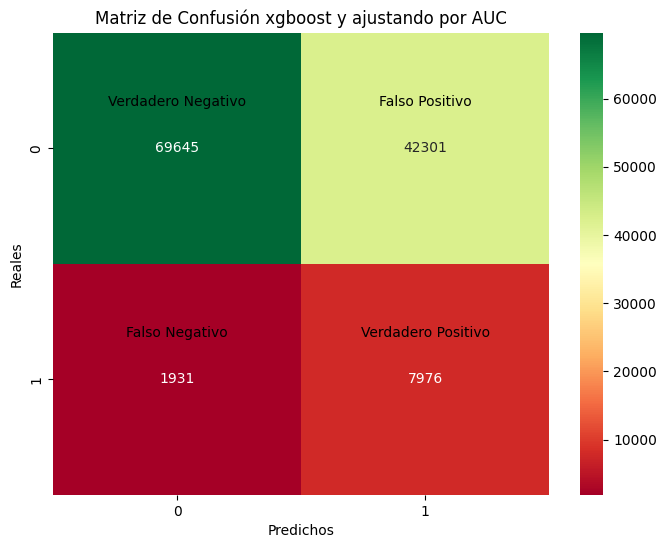

In [97]:
# Graficamos la matriz de confusión -- mejor modelo hasta ahora, ver parametros
import seaborn as sns

graficarMatrizConfusion(y_test, predictions, title="Matriz de Confusión xgboost y ajustando por AUC")

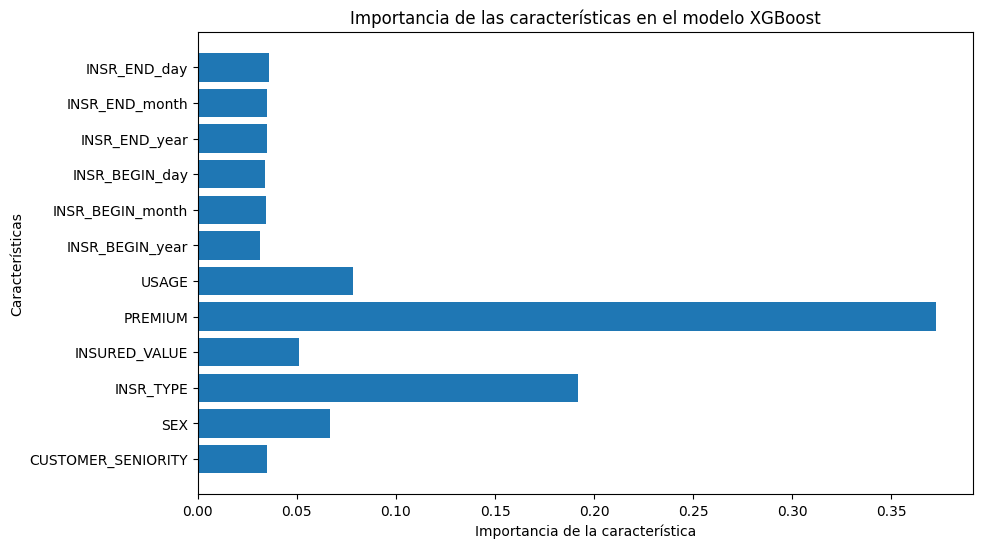

In [98]:
import matplotlib.pyplot as plt

# Entrenar el modelo XGBoost
xgb_model_s.fit(X_train_m, y_train)

# Obtener la importancia de las características
feature_importance = xgb_model_s.feature_importances_

# Obtener el nombre de las características
feature_names = X_train_m.columns

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia de la característica')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo XGBoost')
plt.show()

In [99]:
test_s = test_merged[test_merged['TYPE_VEHICLE'].isna()]
test_s = test_s.drop(['Unnamed: 0', 'PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE'], axis=1)
test_s

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE
3,300477745,08-AUG-17,07-AUG-18,0,Female,1201,418528.41,5140.66,5001113455,Private
4,300477746,08-AUG-17,07-AUG-18,0,Female,1201,418528.41,5140.66,5001113463,Private
6,300477717,08-AUG-17,07-AUG-18,0,Female,1202,1483145.50,16499.45,5001107199,Own Goods
11,300477659,08-AUG-17,07-AUG-18,1,Female,1201,3029192.10,33541.72,5001117177,Private
18,300477744,08-AUG-17,07-AUG-18,0,Female,1201,418528.41,5140.66,5001113449,Private
...,...,...,...,...,...,...,...,...,...,...
94573,300477345,08-JUN-18,07-JUN-19,0,Male,1202,1860000.00,1890.40,5001131074,General Cartage
95137,300477548,10-JUN-18,09-JUN-19,2,Male,1202,2300000.00,45415.08,5001111260,Fare Paying Passengers
95858,300477963,13-JUN-18,12-JUN-19,6,Female,1202,0.00,721.10,5001122559,Own Goods
97370,300477816,19-JUN-18,18-JUN-19,3,Male,1202,0.00,347.70,5001115286,Fare Paying Passengers


In [100]:
df=test_s
#tests = test_merged[test_merged['n'].isna()]

df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'])
df['INSR_END'] = pd.to_datetime(df['INSR_END'])
df['INSR_BEGIN_year'] = df['INSR_BEGIN'].dt.year
df['INSR_BEGIN_month'] = df['INSR_BEGIN'].dt.month
df['INSR_BEGIN_day'] = df['INSR_BEGIN'].dt.day
df['INSR_END_year'] = df['INSR_END'].dt.year
df['INSR_END_month'] = df['INSR_END'].dt.month
df['INSR_END_day'] = df['INSR_END'].dt.day

# Eliminar las columnas originales de fecha

df.drop(columns=['INSR_BEGIN', 'INSR_END'], inplace=True)


df.set_index('POLICY_ID', inplace=True)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable categórica
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['USAGE'] = label_encoder.fit_transform(df['USAGE'])
#df['TYPE_VEHICLE'] = label_encoder.fit_transform(df['TYPE_VEHICLE'])
#df['MAKE'] = label_encoder.fit_transform(df['MAKE'])



df.drop(columns=['VEHICLE_ID'], inplace=True)

test_s= df
test_s


,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,USAGE,INSR_BEGIN_year,INSR_BEGIN_month,INSR_BEGIN_day,INSR_END_year,INSR_END_month,INSR_END_day
POLICY_ID,,,,,,,,,,,,
300477745,0,0,1201,418528.41,5140.66,9,2017,8,8,2018,8,7
300477746,0,0,1201,418528.41,5140.66,9,2017,8,8,2018,8,7
300477717,0,0,1202,1483145.50,16499.45,7,2017,8,8,2018,8,7
300477659,1,0,1201,3029192.10,33541.72,9,2017,8,8,2018,8,7
300477744,0,0,1201,418528.41,5140.66,9,2017,8,8,2018,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
300477345,0,1,1202,1860000.00,1890.40,4,2018,6,8,2019,6,7
300477548,2,1,1202,2300000.00,45415.08,3,2018,6,10,2019,6,9
300477963,6,0,1202,0.00,721.10,7,2018,6,13,2019,6,12


In [101]:

# aunque utilizaria mejor la red
# Hacer predicciones en el conjunto de prueba
predictions2 = xgb_model_s.predict(test_s)
predictions2


# Crear una lista de tuplas con el índice y la predicción
data = [(idx, pred) for idx, pred in zip(test_s.index, predictions2)]

# Convertir la lista en un DataFrame
df_predictions2 = pd.DataFrame(data, columns=['Index', 'Prediction'])

# Imprimir el DataFrame con los índices y las predicciones
print(df_predictions2)

         Index  Prediction
0    300477745           1
1    300477746           1
2    300477717           1
3    300477659           1
4    300477744           1
..         ...         ...
454  300477345           0
455  300477548           1
456  300477963           0
457  300477816           0
458  300477323           0

[459 rows x 2 columns]


##5.3 predicciones

In [102]:
resultado_modelo = pd.concat([df_predictions, df_predictions2], axis=0)
resultado_modelo

,Index,Prediction
0,300439992,0
1,300476572,1
2,300485215,1
3,300485214,1
4,300485217,1
...,...,...
454,300477345,0
455,300477548,1
456,300477963,0
457,300477816,0


In [103]:
resultado_modelo.to_csv('predicciones_modelo.csv', index=False)